In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import scipy as sp
import sympy as sym
import scipy.stats as stats


### QQ -plots

In [2]:
dist1 = np.sort(np.random.rand(5000))
dist2 = np.sort(np.random.uniform(0,1,10000))
dist3 = np.sort(np.random.randn(5000))
dist4 = np.sort(np.random.normal(2,24,10000))
norm_dist = np.sort(np.random.normal(0,1,10000))
np.mean(dist1) , np.mean(dist2) , np.mean(dist3), np.mean(dist4) , np.mean(norm_dist) 

(0.49866777761810127,
 0.4972165714306322,
 0.0035872867040539404,
 2.1572907547958065,
 -0.005703436485167367)

In [3]:
quartiles_norm_dist = np.percentile(norm_dist, [np.arange(0.0,101.0)]).T.astype(np.float32)
q_dist1 = np.percentile(dist1, [np.arange(0.0,101.0)]).T.astype(np.float32)
q_dist2 = np.percentile(dist2, [np.arange(0.0,101.0)]).T.astype(np.float32)
q_dist3 = np.percentile(dist3, [np.arange(0.0,101.0)]).T.astype(np.float32)
q_dist4 = np.percentile(dist4, [np.arange(0.0,101.0)]).T.astype(np.float32)

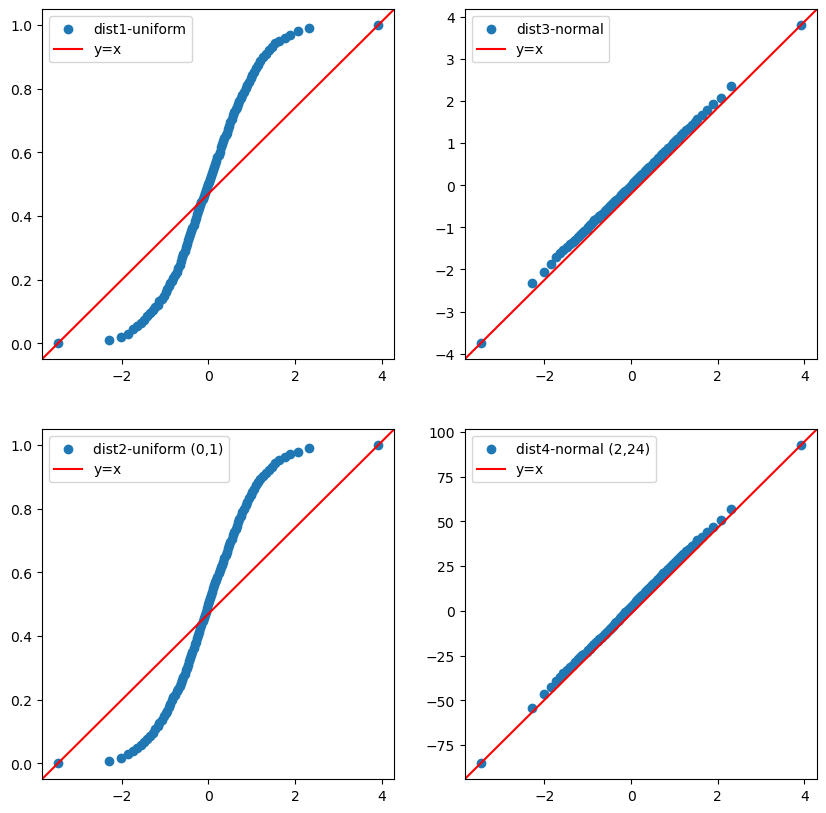

In [4]:
fig , ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter( quartiles_norm_dist ,q_dist1,  label='dist1-uniform')
ax[0,0].axline((np.min(quartiles_norm_dist),np.min(q_dist1)),(np.max(quartiles_norm_dist),np.max(q_dist1)), color='red', label='y=x')
ax[0,0].legend()
ax[1,0].scatter( quartiles_norm_dist ,q_dist2,  label='dist2-uniform (0,1)')
ax[1,0].axline((np.min(quartiles_norm_dist),np.min(q_dist2)),(np.max(quartiles_norm_dist),np.max(q_dist2)), color='red', label='y=x')
ax[1,0].legend()
ax[0,1].scatter( quartiles_norm_dist ,q_dist3,  label='dist3-normal')
ax[0,1].axline((np.min(quartiles_norm_dist),np.min(q_dist3)),(np.max(quartiles_norm_dist),np.max(q_dist3)), color='red', label='y=x')
ax[0,1].legend()
ax[1,1].scatter( quartiles_norm_dist ,q_dist4,  label='dist4-normal (2,24)')
ax[1,1].axline((np.min(quartiles_norm_dist),np.min(q_dist4)),(np.max(quartiles_norm_dist),np.max(q_dist4)), color='red', label='y=x')
ax[1,1].legend()

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([1.63597398e-04, 4.77439540e-04, 9.29421945e-04, ...,
         9.99269559e-01, 9.99748439e-01, 9.99815722e-01])),
 (0.2806062763129096, 0.49866777761810127, 0.9783408248479468))

Text(0.5, 1.0, 'QQ Plot of dist1')

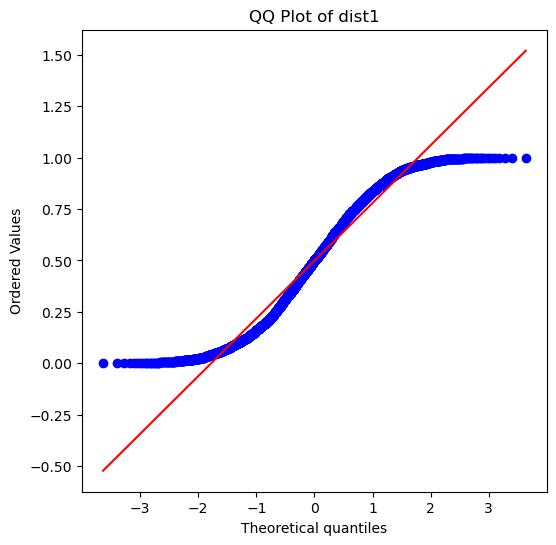

In [5]:

fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(dist1, dist="norm", plot=ax)
ax.set_title('QQ Plot of dist1')
plt.show()

### finding distributions 

#### Dataset 1 : incomes

array(['<=50K', '>50K'], dtype=object)

<Axes: ylabel='Frequency'>

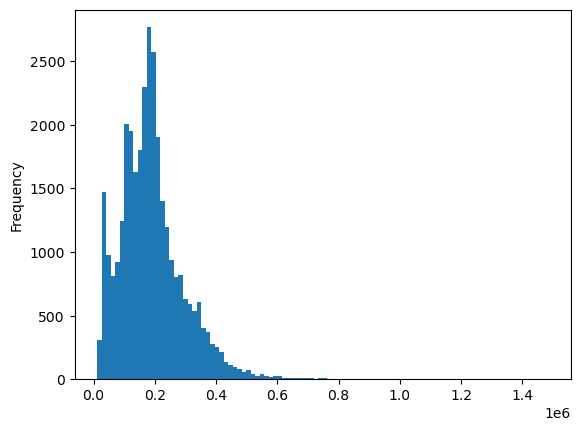

In [7]:
ic1_df = pd.read_csv('./data/census-income .csv')
ic1_df['annual_income'].unique()
ic1_df.fnlwgt.plot(kind='hist', bins=100)

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.400e+01, 3.200e+01, 1.500e+01,
        4.100e+01, 4.300e+01, 6.600e+01, 4.500e+01, 1.100e+02, 1.050e+02,
        1.550e+02, 1.670e+02, 2.080e+02, 2.280e+02, 1.720e+02, 1.740e+02,
        1.370e+02, 1.160e+02, 1.310e+02, 1.180e+02, 1.630e+02, 1.650e+02,
        1.860e+02, 1.940e+02, 1.520e+02, 1.610e+02, 1.600e+02, 1.700e+02,
        1.930e+02, 1.980e+02, 2.310e+02, 2.790e+02, 2.770e+02, 3.070e+02,
        3.510e+02, 5.380e+02, 6.710e+02, 7.090e+02, 7.850e+02, 8.280e+02,
        7.440e+02, 6.520e+02, 7.310e+02, 8.650e+02, 9.310e+02, 1.037e+03,
        1.244e+03, 1.520e+03, 1.644e+03, 1.682e+03, 1.530e+03, 1.249e+03,
        1.067e+03, 9.610e+02, 8.680e+02, 7.610e+02, 7.070e+02, 7.630e+02,
        6.050e+02, 6.260e+02, 5.710e+02, 6.610e+02, 4.600e+02, 4.150e+02,
        3.330e+02, 2.890e+02, 1.910e+02, 1.410e+02, 1.060e+02, 1.050e+02,
        5.200e+01, 6.200e+01, 4.200e+0

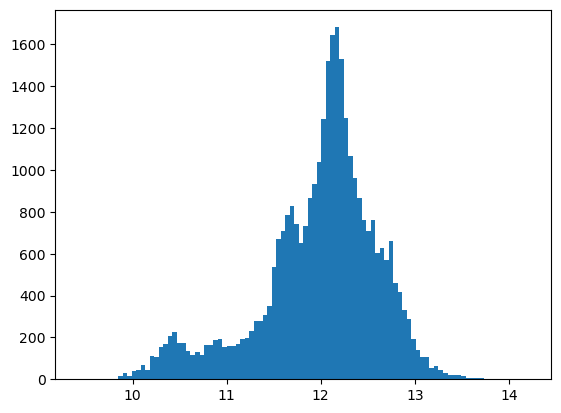

In [8]:
log_wt = np.log(ic1_df.fnlwgt)
plt.hist(log_wt, bins=100)

((array([-4.09304314, -3.88260508, -3.76768895, ...,  3.76768895,
          3.88260508,  4.09304314]),
  array([ 9.41613428,  9.53017497,  9.60763889, ..., 14.12748516,
         14.19081538, 14.21072666])),
 (0.61474772337628, 11.983770098663165, 0.9745338182896636))

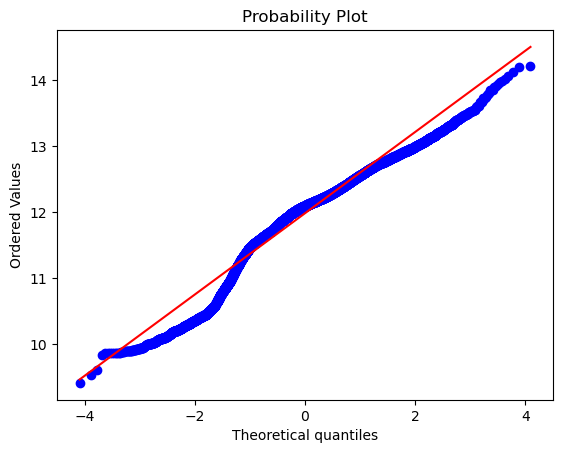

In [9]:
stats.probplot(log_wt, dist="norm", plot=plt)

> log of incomes are in near normal dist. Thus , incomes are in **LOG - NORMAL** dist

#### Dataset 2 : ev cars prices

In [10]:
ev_cars_df = pd.read_excel('./data/cars_ds_final_cleaned.xlsx')
ev_cars_df.shape

(1201, 19)

<Axes: ylabel='Frequency'>

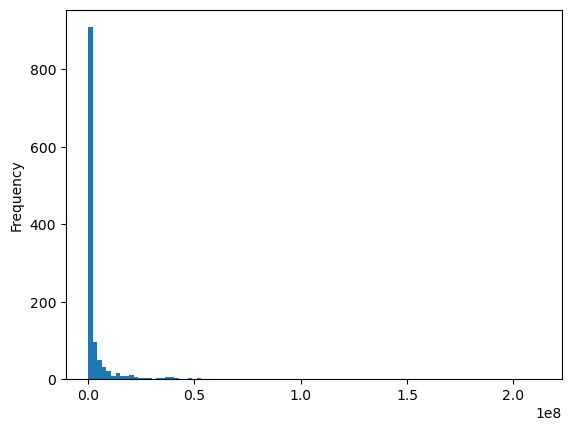

In [11]:
ev_cars_prices = ev_cars_df[ev_cars_df['Ex-Showroom_Price'] != 0]['Ex-Showroom_Price']
ev_cars_prices.plot(kind='hist', bins=100)

(array([ 1.,  1.,  6.,  4.,  1.,  7., 10.,  7., 12., 14., 20., 32., 32.,
        35., 38., 52., 50., 66., 52., 56., 60., 70., 35., 35., 36., 31.,
        29., 16., 27., 21., 18., 16., 14., 10.,  4.,  7., 16., 16., 13.,
        10.,  7.,  5., 10.,  9.,  5.,  0., 11., 16.,  9.,  7.,  8.,  9.,
         8.,  6.,  7.,  6.,  4.,  4.,  1., 10.,  5.,  5.,  2.,  6.,  7.,
         3.,  5.,  5.,  2.,  3.,  2.,  1.,  4.,  4.,  5.,  8.,  3.,  2.,
         1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([12.37347936, 12.44147286, 12.50946636, 12.57745987, 12.64545337,
        12.71344687, 12.78144037, 12.84943387, 12.91742738, 12.98542088,
        13.05341438, 13.12140788, 13.18940139, 13.25739489, 13.32538839,
        13.39338189, 13.46137539, 13.5293689 , 13.5973624 , 13.6653559 ,
        13.7333494 , 13.8013429 , 13.86933641, 13.93732991, 14.00532341,
        14.07331691, 14.14131041, 14.20930392, 14.27729742, 14.345290

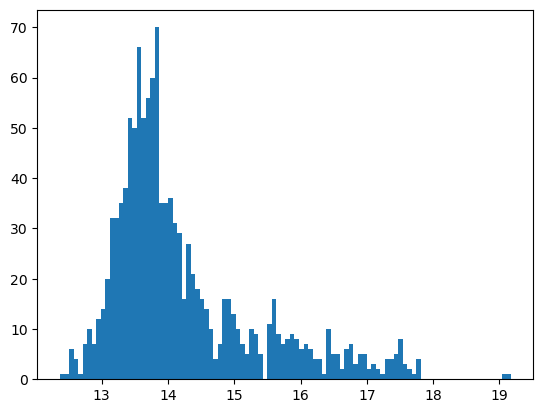

In [12]:
ev_p_log = np.log(ev_cars_prices)
plt.hist(ev_p_log, bins=100)

((array([5.77141699e-04, 1.40147188e-03, 2.23537336e-03, ...,
         6.10446449e+00, 6.57093291e+00, 7.45771130e+00]),
  array([   236447,    263000,    272223, ...,  53210327, 192142937,
         212155397], dtype=int64)),
 (8405775.103188984, -4473340.364638114, 0.7592389143310323))

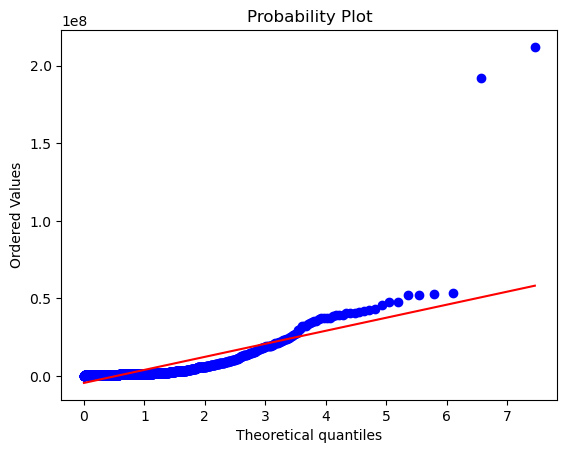

In [13]:
stats.probplot(ev_cars_prices, dist="expon", plot=plt)

((array([-3.25002457, -2.98877528, -2.84323924, ...,  2.84323924,
          2.98877528,  3.25002457]),
  array([   236447,    263000,    272223, ...,  53210327, 192142937,
         212155397], dtype=int64)),
 (5890332.331856714, 3921370.099916737, 0.5344342575206394))

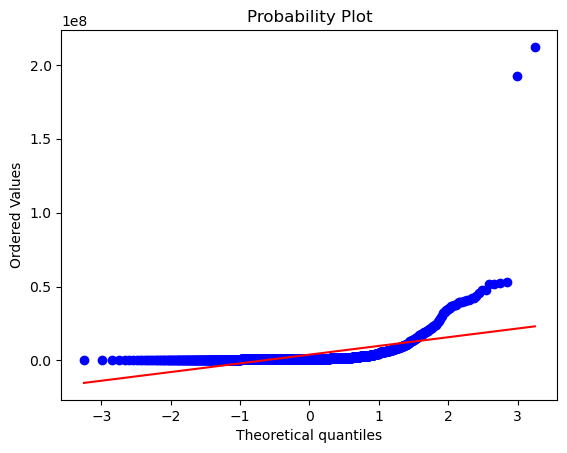

In [14]:
stats.probplot(ev_cars_prices, dist="norm", plot=plt)

<Axes: ylabel='Frequency'>

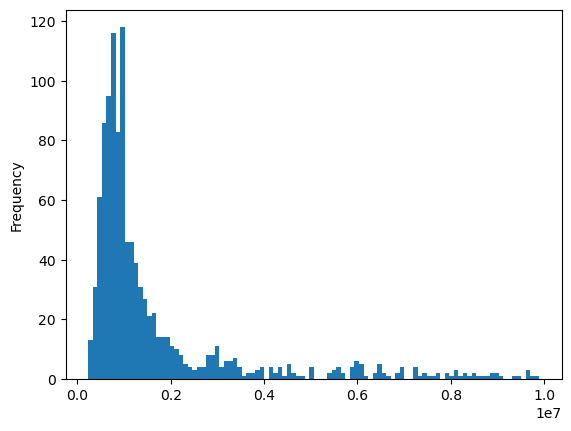

In [15]:
# removing outliers 
ev_cars_prices = ev_cars_prices[ev_cars_prices < 10000000]
ev_cars_prices.plot(kind='hist', bins=100)



(array([ 1.,  0.,  1.,  1.,  5.,  2.,  2.,  1.,  0.,  2.,  6.,  3.,  7.,
         4.,  5.,  4., 11.,  5., 12., 11., 12., 23., 16., 17., 26., 15.,
        20., 28., 27., 25., 32., 33., 40., 29., 29., 28., 32., 32., 59.,
        17., 18., 23., 19., 20., 17., 26., 12., 16., 16.,  8., 12., 21.,
         8., 10.,  9., 11.,  8., 10.,  9.,  8.,  3.,  7.,  1.,  3.,  4.,
         8.,  5., 14.,  7.,  7.,  7.,  7.,  4.,  3.,  4.,  4.,  4.,  4.,
         7.,  4.,  1.,  4.,  0.,  2.,  7.,  2., 15.,  1.,  8.,  2.,  6.,
         5.,  4.,  4.,  5.,  5.,  3.,  5.,  2.,  5.]),
 array([12.37347936, 12.41082502, 12.44817068, 12.48551634, 12.522862  ,
        12.56020766, 12.59755332, 12.63489898, 12.67224464, 12.7095903 ,
        12.74693596, 12.78428162, 12.82162727, 12.85897293, 12.89631859,
        12.93366425, 12.97100991, 13.00835557, 13.04570123, 13.08304689,
        13.12039255, 13.15773821, 13.19508387, 13.23242953, 13.26977519,
        13.30712085, 13.34446651, 13.38181217, 13.41915783, 13.456503

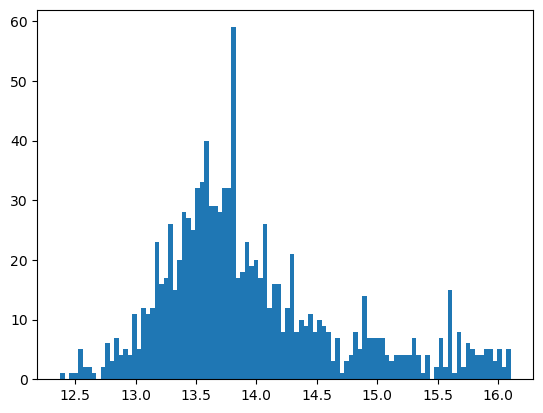

In [16]:
ev_p_log = np.log(ev_cars_prices)
plt.hist(ev_p_log, bins=100)

((array([6.31857047e-04, 1.53439479e-03, 2.44748468e-03, ...,
         6.01391794e+00, 6.48038635e+00, 7.36716329e+00]),
  array([ 236447,  263000,  272223, ..., 9689321, 9738609, 9900000],
        dtype=int64)),
 (1749528.6632255777, -84967.75101081282, 0.9595021382024079))

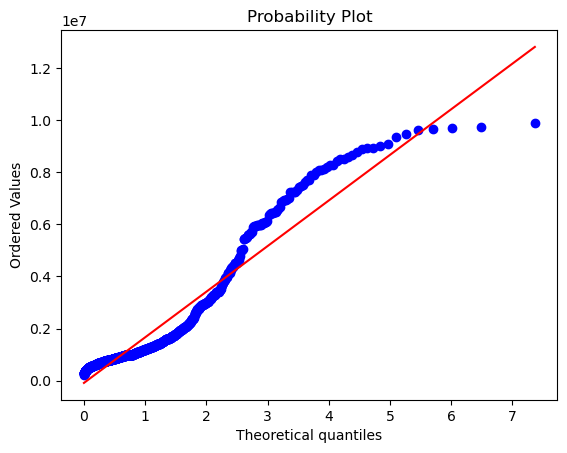

In [17]:
stats.probplot(ev_cars_prices, dist="expon", plot=plt)

((array([-3.2241856 , -2.96099829, -2.81425887, ...,  2.81425887,
          2.96099829,  3.2241856 ]),
  array([ 236447,  263000,  272223, ..., 9689321, 9738609, 9900000],
        dtype=int64)),
 (1450145.7270616381, 1662066.0127620785, 0.799145968728881))

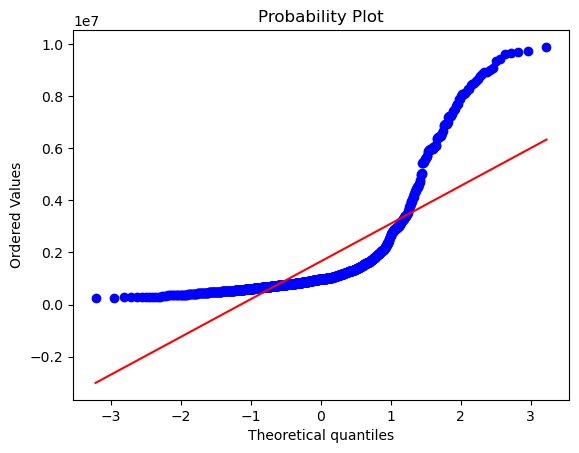

In [18]:
stats.probplot(ev_cars_prices, dist="norm", plot=plt)

((array([6.31857047e-04, 1.53439479e-03, 2.44748468e-03, ...,
         6.01391794e+00, 6.48038635e+00, 7.36716329e+00]),
  array([12.37347936, 12.47990931, 12.51437686, ..., 16.08653491,
         16.09160885, 16.10804532])),
 (0.7371437598835171, 13.233983241715142, 0.9630029689308466))

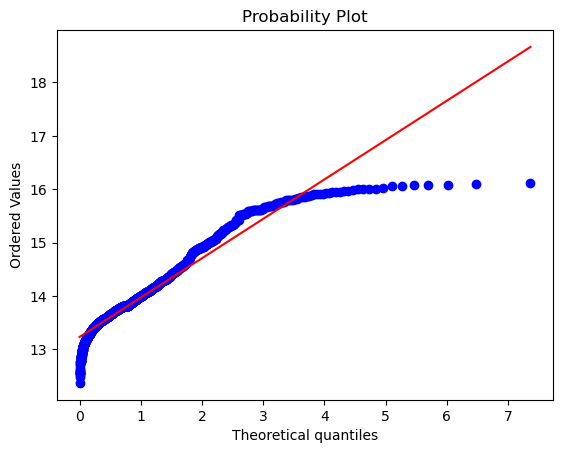

In [19]:
stats.probplot(ev_p_log, dist="expon", plot=plt)

((array([-3.2241856 , -2.96099829, -2.81425887, ...,  2.81425887,
          2.96099829,  3.2241856 ]),
  array([12.37347936, 12.47990931, 12.51437686, ..., 16.08653491,
         16.09160885, 16.10804532])),
 (0.7328449116947063, 13.970075804438109, 0.9620044707553932))

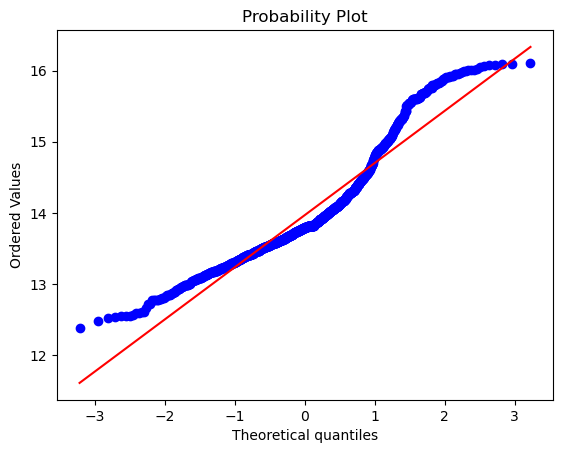

In [20]:
stats.probplot(ev_p_log, dist="norm", plot=plt)


> log of prices are in near normal dist. Thus , ev car prices are in **LOG - NORMAL** dist

#### Dataset 3 : enrolements in school

In [21]:
en_df = pd.read_csv('./data/enrolment_age_2019_20.csv')
en_df.shape

(14660, 30)

In [22]:
en_df['number_of_students'] = en_df['class_1_boys'] + en_df['class_1_girls'] + \
    en_df['class_2_boys'] + en_df['class_2_girls'] +\
    en_df['class_3_boys'] + en_df['class_3_girls'] +\
    en_df['class_4_boys'] + en_df['class_4_girls'] +\
    en_df['class_5_boys'] + en_df['class_5_girls'] +\
    en_df['class_6_boys'] + en_df['class_6_girls'] +\
    en_df['class_7_boys'] + en_df['class_7_girls'] +\
    en_df['class_8_boys'] + en_df['class_8_girls'] +\
    en_df['class_9_boys'] + en_df['class_9_girls'] +\
    en_df['class_10_boys'] + en_df['class_10_girls'] +\
    en_df['class_11_boys'] + en_df['class_11_girls'] +\
    en_df['class_12_boys'] + en_df['class_12_girls']
en_df['code'] = en_df['state_cd'].astype(str) + en_df['district_cd'].astype(str)
age_df = en_df[['age','number_of_students']]
en_df[['state_cd','district_cd' , 'number_of_students']]

,state_cd,district_cd,number_of_students
0,1,101,4135
1,1,102,2084
2,1,103,862
3,1,104,3337
4,1,105,2210
...,...,...,...
14655,36,3631,669
14656,36,3632,99
14657,36,3633,221
14658,37,3707,6


no of students different districts 

<Axes: ylabel='Frequency'>

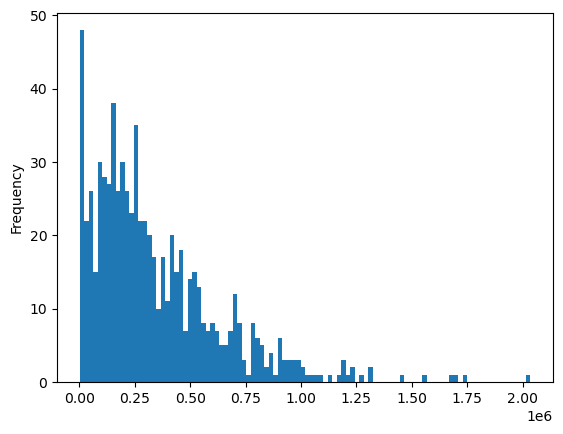

In [23]:
en_dist_df = en_df.groupby('district_cd').agg({'number_of_students':'sum'}).reset_index()
en_dist_df.number_of_students.plot(kind='hist', bins=100)

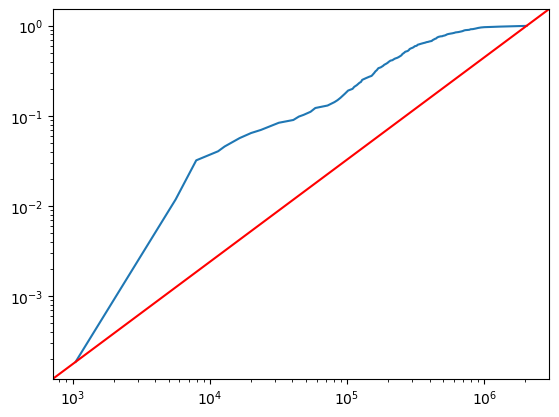

In [24]:
power_law = np.sort(np.random.power(1,len(en_dist_df)))
power_per = np.percentile(en_dist_df.number_of_students, [np.arange(0.0,101.0)]).T.astype(np.float32)
power_law = np.percentile(power_law, [np.arange(0.0,101.0)]).T.astype(np.float32)
plt.loglog(power_per, power_law)
plt.axline((np.min(power_per),np.min(power_law)),(np.max(power_per),np.max(power_law)), color='red', label='y=x')

no of students across different states

<Axes: xlabel='state_cd'>

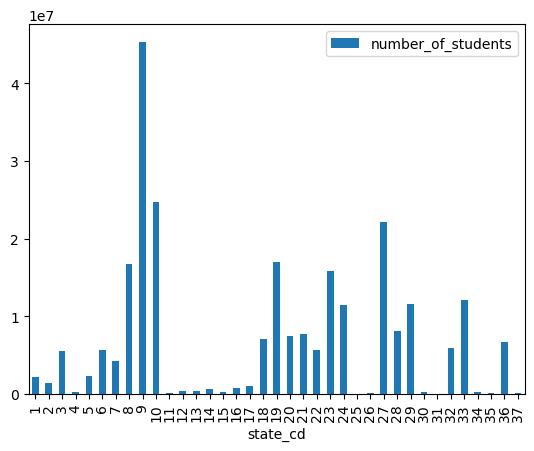

In [25]:
en_state_df = en_df.groupby('state_cd').agg({'number_of_students':'sum'}).reset_index()
en_state_df.plot(kind='bar', x='state_cd', y='number_of_students')

<Axes: xlabel='age'>

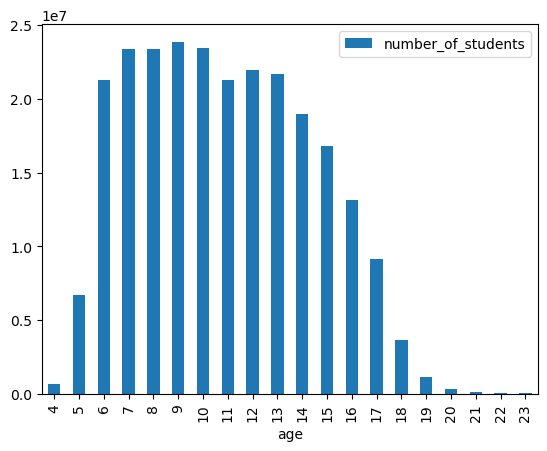

In [26]:
age_df = age_df.groupby('age').agg({'number_of_students':'sum'})
age_df.plot(kind='bar')

In [27]:
ev_cars_prices.shape[0],np.mean(ev_cars_prices) , np.median(ev_cars_prices) , np.std(ev_cars_prices) , sp.stats.mode(ev_cars_prices).mode

(1097, 1662066.0127620783, 979300.0, 1809970.0355394743, 999900)

(array([ 13.,  31.,  61.,  86.,  95., 116.,  83., 118.,  46.,  46.,  39.,
         31.,  27.,  21.,  22.,  14.,  14.,  14.,  11.,  10.,   8.,   5.,
          4.,   3.,   4.,   4.,   8.,   8.,  11.,   4.,   6.,   6.,   7.,
          4.,   1.,   2.,   2.,   3.,   4.,   0.,   4.,   2.,   4.,   1.,
          5.,   2.,   1.,   1.,   0.,   4.,   0.,   0.,   0.,   2.,   3.,
          4.,   2.,   0.,   4.,   6.,   5.,   1.,   0.,   2.,   5.,   2.,
          1.,   0.,   2.,   4.,   0.,   0.,   4.,   1.,   2.,   1.,   1.,
          2.,   0.,   2.,   1.,   3.,   1.,   2.,   1.,   2.,   1.,   1.,
          1.,   2.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   3.,   1.,
          1.]),
 array([ 236447.  ,  333082.53,  429718.06,  526353.59,  622989.12,
         719624.65,  816260.18,  912895.71, 1009531.24, 1106166.77,
        1202802.3 , 1299437.83, 1396073.36, 1492708.89, 1589344.42,
        1685979.95, 1782615.48, 1879251.01, 1975886.54, 2072522.07,
        2169157.6 , 2265793.13, 2362428.66, 24

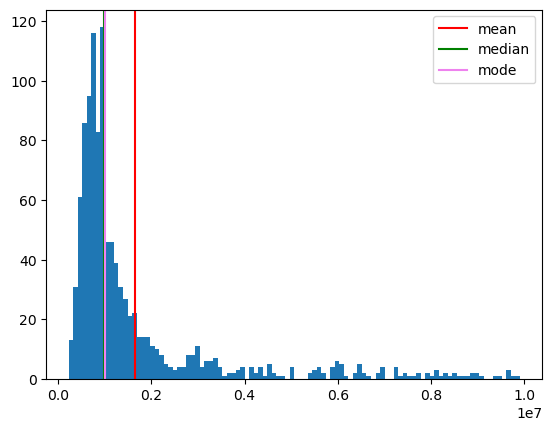

In [28]:
plt.hist(ev_cars_prices, bins=100)
plt.axvline(np.mean(ev_cars_prices), color='red', label='mean')
plt.axvline(np.median(ev_cars_prices), color='green', label='median')
plt.axvline(sp.stats.mode(ev_cars_prices).mode, color='violet', label='mode')
plt.legend()

Estimate mean using sample

(1468246.37, 937446.0, 819117)

(array([ 3.,  1.,  4., 10.,  7.,  9., 13.,  4.,  5.,  5.,  6.,  4.,  1.,
         3.,  4.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 236447.  ,  327746.86,  419046.72,  510346.58,  601646.44,
         692946.3 ,  784246.16,  875546.02,  966845.88, 1058145.74,
        1149445.6 , 1240745.46, 1332045.32, 1423345.18, 1514645.04,
        1605944.9 , 1697244.76, 1788544.62, 1879844.48, 1971144.34,
        2062444.2 , 2153744.06, 2245043.92, 2336343.78, 2427643.64,
        2518943.5 , 2610243.36, 2701543.22, 2792843.08, 2884142.94,
        2975442.8 , 306674

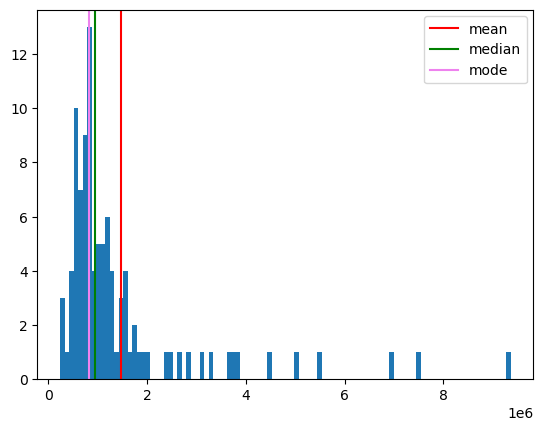

In [29]:
sample_prices = np.random.choice(ev_cars_prices, 100)
np.mean(sample_prices) , np.median(sample_prices) , sp.stats.mode(sample_prices).mode
plt.hist(sample_prices, bins=100)
plt.axvline(np.mean(sample_prices), color='red', label='mean')
plt.axvline(np.median(sample_prices), color='green', label='median')
plt.axvline(sp.stats.mode(sample_prices).mode, color='violet', label='mode')
plt.legend()

In [30]:
sample_price_means = []
for i in range(10000):
    sample_prices = np.random.choice(ev_cars_prices, 10)
    sample_price_means.append(np.mean(sample_prices))
# plt.hist(sample_price_means , bins= 100)
x_bar = np.mean(sample_price_means)
two_sigma = 2 * np.std(sample_price_means)
print('C.I. :' , round(x_bar - two_sigma,2) , 'to' , round(x_bar + two_sigma ,2 ), 'with 95% confidence')
print('population mean :', round(np.mean(ev_cars_prices),2)) 
np.min(sample_price_means) , np.max(sample_price_means)

C.I. : 522735.04 to 2795596.89 with 95% confidence
population mean : 1662066.01


(616817.7, 4935430.7)

In [31]:
# Number of bootstrap samples
n_bootstrap_samples = 10000

# Array to store the medians of bootstrap samples
bootstrap_medians = []

# Perform bootstrap sampling
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample_prices, size=len(sample_prices), replace=True)
    bootstrap_median = np.median(bootstrap_sample)
    bootstrap_medians.append(bootstrap_median)

# Calculate the estimated median of the population
estimated_median = np.median(bootstrap_medians)
print(f'Estimated median of the population: {estimated_median}')
print(f'Confidence interval: {np.percentile(bootstrap_medians, [2.5, 97.5])}')
print(f'True median of the population: {np.median(ev_cars_prices)}')

Estimated median of the population: 990292.0
Confidence interval: [ 746621. 3029599.]
True median of the population: 979300.0


Hypothesis Testing

<Figure size 1000x600 with 0 Axes>

(array([1.22630893e-07, 2.92427515e-07, 5.75421884e-07, 8.11250525e-07,
        8.96148836e-07, 1.09424489e-06, 7.82951088e-07, 1.11311119e-06,
        4.33924699e-07, 4.33924699e-07, 3.67892680e-07, 2.92427515e-07,
        2.54694932e-07, 1.98096058e-07, 2.07529204e-07, 1.32064039e-07,
        1.32064039e-07, 1.32064039e-07, 1.03764602e-07, 9.43314564e-08,
        7.54651651e-08, 4.71657282e-08, 3.77325826e-08, 2.82994369e-08,
        3.77325826e-08, 3.77325826e-08, 7.54651651e-08, 7.54651651e-08,
        1.03764602e-07, 3.77325826e-08, 5.65988738e-08, 5.65988738e-08,
        6.60320195e-08, 3.77325826e-08, 9.43314564e-09, 1.88662913e-08,
        1.88662913e-08, 2.82994369e-08, 3.77325826e-08, 0.00000000e+00,
        3.77325826e-08, 1.88662913e-08, 3.77325826e-08, 9.43314564e-09,
        4.71657282e-08, 1.88662913e-08, 9.43314564e-09, 9.43314564e-09,
        0.00000000e+00, 3.77325826e-08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.88662913e-08, 2.82994369e-08, 3.773258

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'KDE Plot of EV Car Prices')

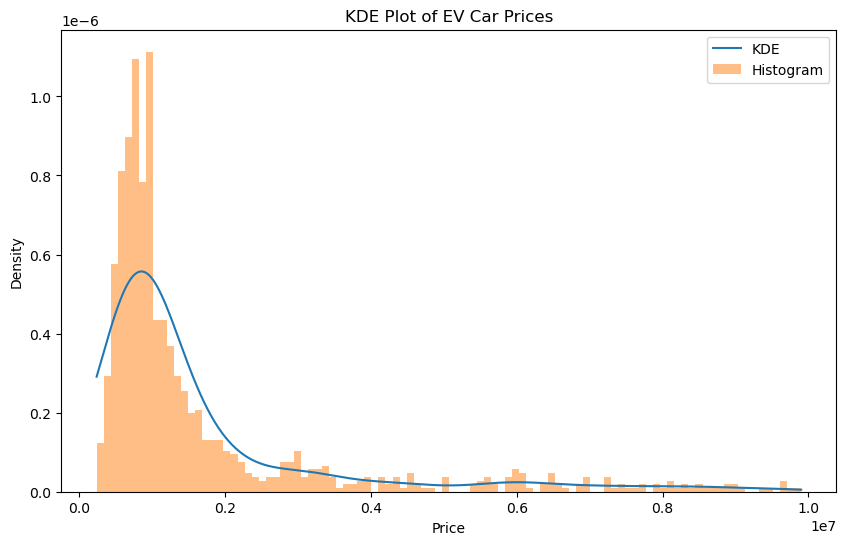

In [35]:
from scipy.stats import gaussian_kde

# Sample data
data = ev_cars_prices

# Create a Gaussian KDE
kde = gaussian_kde(data)

# Create a range of values for the x-axis
x = np.linspace(min(data), max(data), 1000)

# Evaluate the KDE on the x values
kde_values = kde(x)

# Plot the KDE
plt.figure(figsize=(10, 6))
plt.plot(x, kde_values, label='KDE')
plt.hist(data, bins=100, density=True, alpha=0.5, label='Histogram')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE Plot of EV Car Prices')
plt.legend()
plt.show()

In [46]:
stats.kstest(ev_cars_prices, 'norm')
stats.kstest(ev_cars_prices, 'expon')
stats.kstest(ev_cars_prices, 'uniform')
stats.kstest(np.log(ev_cars_prices), 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=236447, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=236447, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=236447, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12.37347936031972, statistic_sign=-1)

<Axes: ylabel='Density'>

KstestResult(statistic=0.003132246927930238, pvalue=0.2797391494762512, statistic_location=0.661806084578213, statistic_sign=-1)

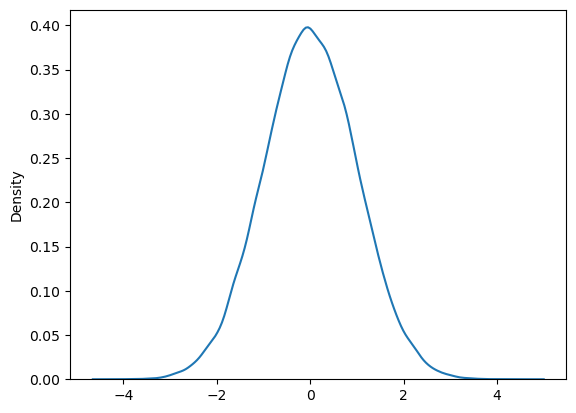

In [42]:
n = 100000
norm_dist = np.random.normal(0,1,n)
sns.kdeplot(norm_dist, label='Normal')
stats.kstest(norm_dist, 'norm')

KstestResult(statistic=0.0017466344862388794, pvalue=0.9199153566677803, statistic_location=0.213981444996514, statistic_sign=-1)

<Axes: ylabel='Density'>

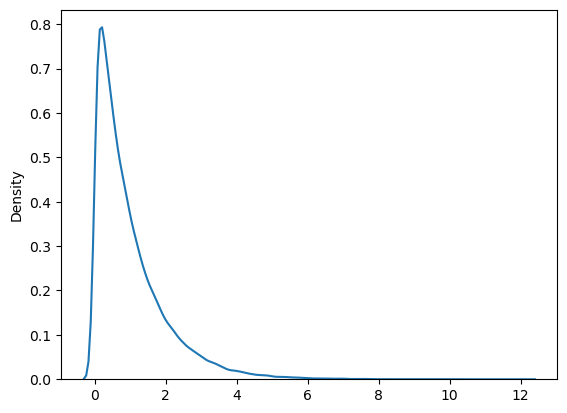

In [43]:

expon_dist = np.random.exponential(1,n)
stats.kstest(expon_dist, 'expon')
sns.kdeplot(expon_dist, label='Exponential')


KstestResult(statistic=0.0014609911945501763, pvalue=0.9830369168323853, statistic_location=0.40979900880544984, statistic_sign=1)

<Axes: ylabel='Density'>

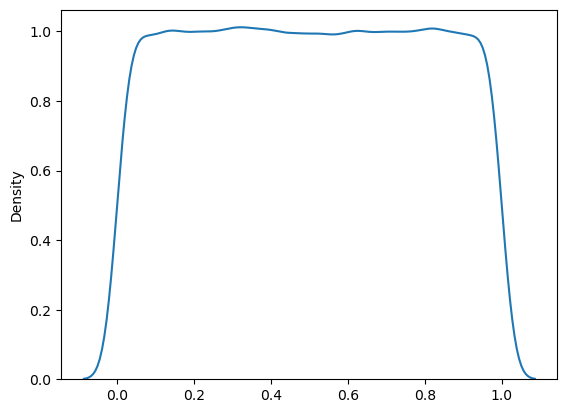

In [44]:

uniform_dist = np.random.uniform(0,1,n)
stats.kstest(uniform_dist, 'uniform')
sns.kdeplot(uniform_dist, label='Uniform')

<Axes: xlabel='fnlwgt', ylabel='Density'>

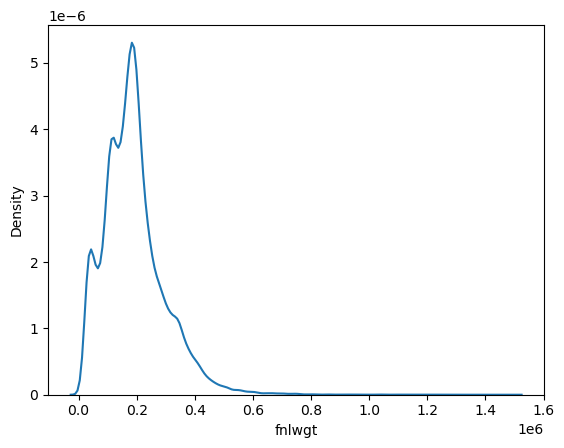

In [48]:
incomes = ic1_df.fnlwgt
sns.kdeplot(incomes, label='Income')

In [49]:
stats.kstest(incomes, 'norm')
stats.kstest(incomes, 'expon')
stats.kstest(incomes, 'uniform')
stats.kstest(np.log(incomes), 'norm')
stats.kstest(np.log(incomes), 'expon')
stats.kstest(np.log(incomes), 'uniform')


KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12285, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12285, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12285, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.41613428495528, statistic_sign=-1)

KstestResult(statistic=0.9999185999185999, pvalue=0.0, statistic_location=9.41613428495528, statistic_sign=-1)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.41613428495528, statistic_sign=-1)

sampling wrt value : proportionality sampling

0.5007749149389628

<Axes: ylabel='Density'>

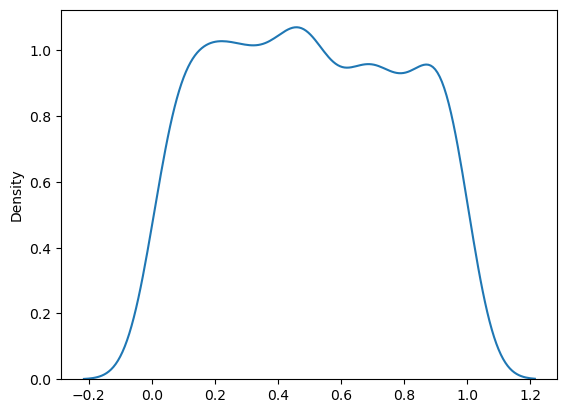

In [58]:
vals = np.random.random(1000)
np.mean(vals )
sns.kdeplot(vals, label='Random')


<Axes: ylabel='Density'>

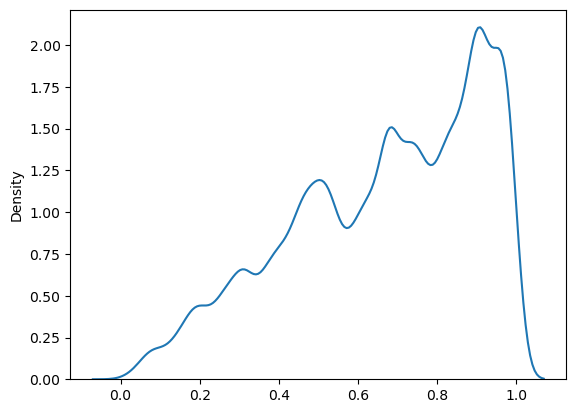

In [60]:
sample = np.random.choice(vals, 100000, p=vals/np.sum(vals))
sns.kdeplot(sample, label='Sample')

<Axes: ylabel='Density'>

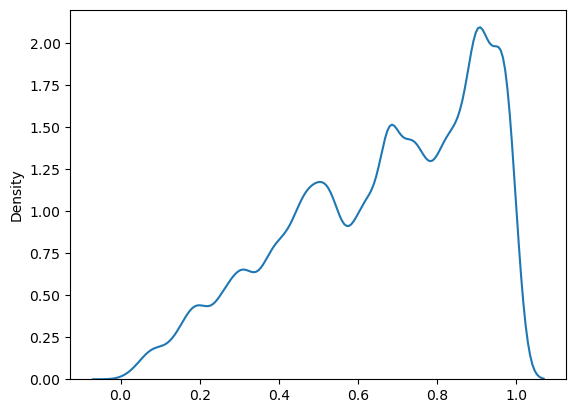

In [61]:
def proportionality_sampling(A, n):
    B = A / np.sum(A)
    C = np.cumsum(B)
    Sample = []
    for i in range(n):
        r = np.random.random()
        for i in range(len(C)):
            if r <= C[i]:
                Sample.append(A[i])
                break
    return Sample

my_sample = proportionality_sampling(vals, 100000)
sns.kdeplot(my_sample, label='My Sample')